In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set map theme
sns.set(style="dark")

# Load data

In [78]:
data = pd.read_csv('pollution_us_2000_2016.csv')

In [79]:
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [11]:
data.columns

Index([u'Unnamed: 0', u'State Code', u'County Code', u'Site Num', u'Address',
       u'State', u'County', u'City', u'Date Local', u'NO2 Units', u'NO2 Mean',
       u'NO2 1st Max Value', u'NO2 1st Max Hour', u'NO2 AQI', u'O3 Units',
       u'O3 Mean', u'O3 1st Max Value', u'O3 1st Max Hour', u'O3 AQI',
       u'SO2 Units', u'SO2 Mean', u'SO2 1st Max Value', u'SO2 1st Max Hour',
       u'SO2 AQI', u'CO Units', u'CO Mean', u'CO 1st Max Value',
       u'CO 1st Max Hour', u'CO AQI'],
      dtype='object')

# Cleanse data

In [58]:
# Check if any cell is null
data.isnull().any()

Unnamed: 0           False
State Code           False
County Code          False
Site Num             False
Address              False
State                False
County               False
City                 False
Date Local           False
NO2 Units            False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Units             False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Units            False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI              False
CO Units             False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI               False
dtype: bool

In [37]:
# Remove empty cells
data.dropna(inplace=True)

In [39]:
data.reset_index(inplace=True, drop=True)
data.isnull().any()

Unnamed: 0           False
State Code           False
County Code          False
Site Num             False
Address              False
State                False
County               False
City                 False
Date Local           False
NO2 Units            False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Units             False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Units            False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI              False
CO Units             False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI               False
dtype: bool

In [ ]:
# Create new dataframe with the required columns
data1=data.drop(['State Code', 'County Code','Site Num','Address','County','City','NO2 Units','NO2 1st Max Value','NO2 1st Max Hour','O3 Units','O3 1st Max Value','O3 1st Max Value','O3 1st Max Hour', 'SO2 Units','SO2 1st Max Value','SO2 1st Max Hour','CO Units','CO 1st Max Value','CO 1st Max Hour','Unnamed: 0'], axis=1)

In [52]:
data1.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
1,Arizona,2000-01-02,22.958333,34,0.013375,27,1.958333,4.0,1.066667,26.0
2,Arizona,2000-01-03,38.125000,48,0.007958,14,5.250000,16.0,1.762500,28.0
3,Arizona,2000-01-04,40.260870,72,0.014167,28,7.083333,23.0,1.829167,34.0
4,Arizona,2000-01-05,48.450000,58,0.006667,10,8.708333,21.0,2.700000,42.0


# Plotting

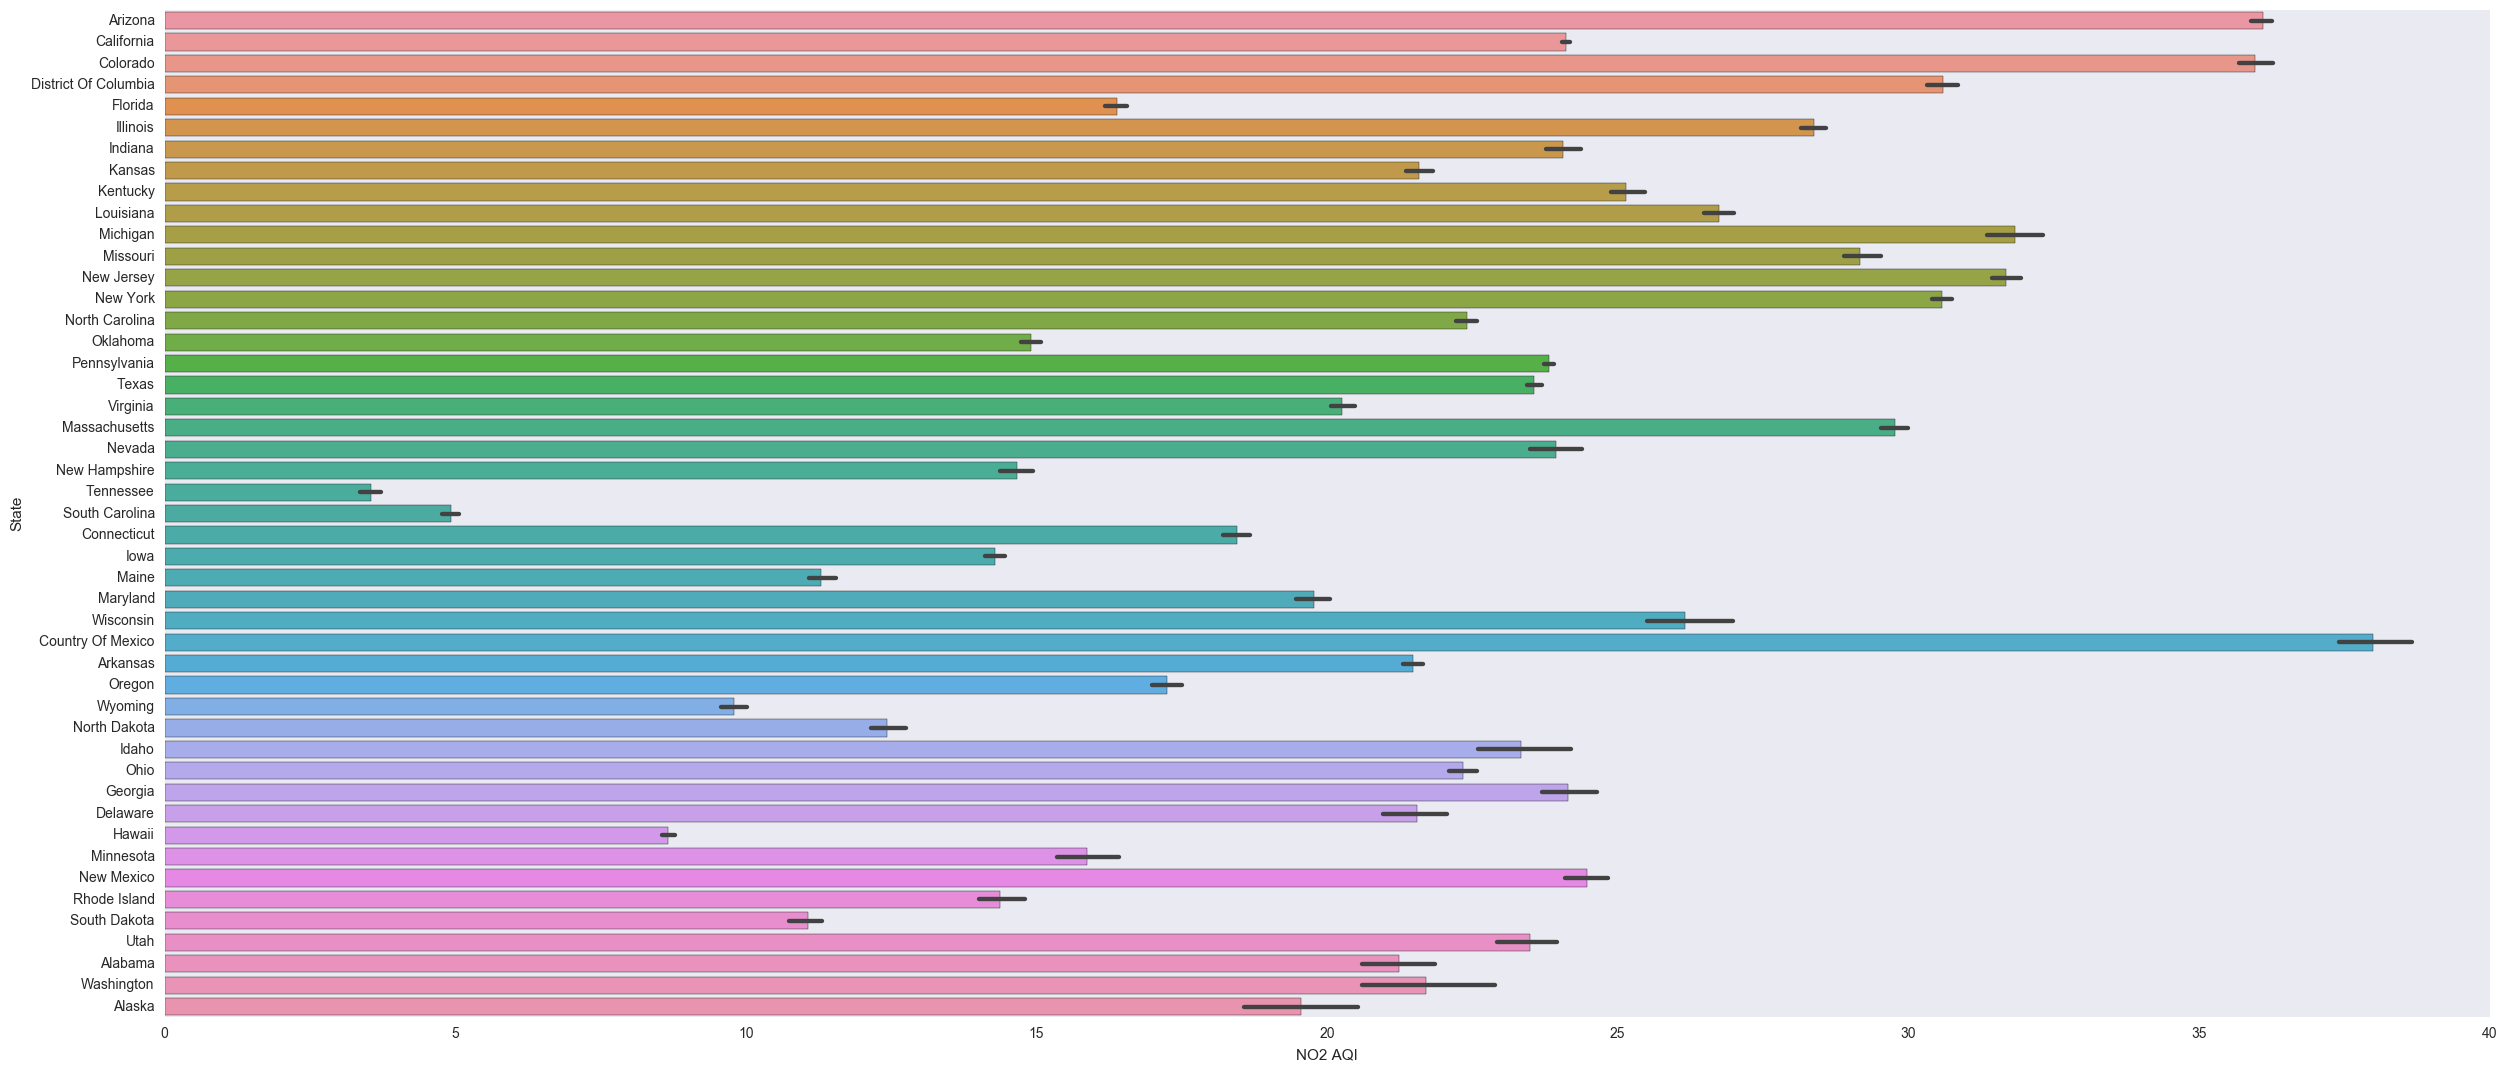

In [81]:
# NO2 AQI for every State - bar plot
ax = sns.barplot(x="NO2 AQI", y="State", data=data, ci=100)
fig = plt.gcf()
fig.set_size_inches(30, 13)

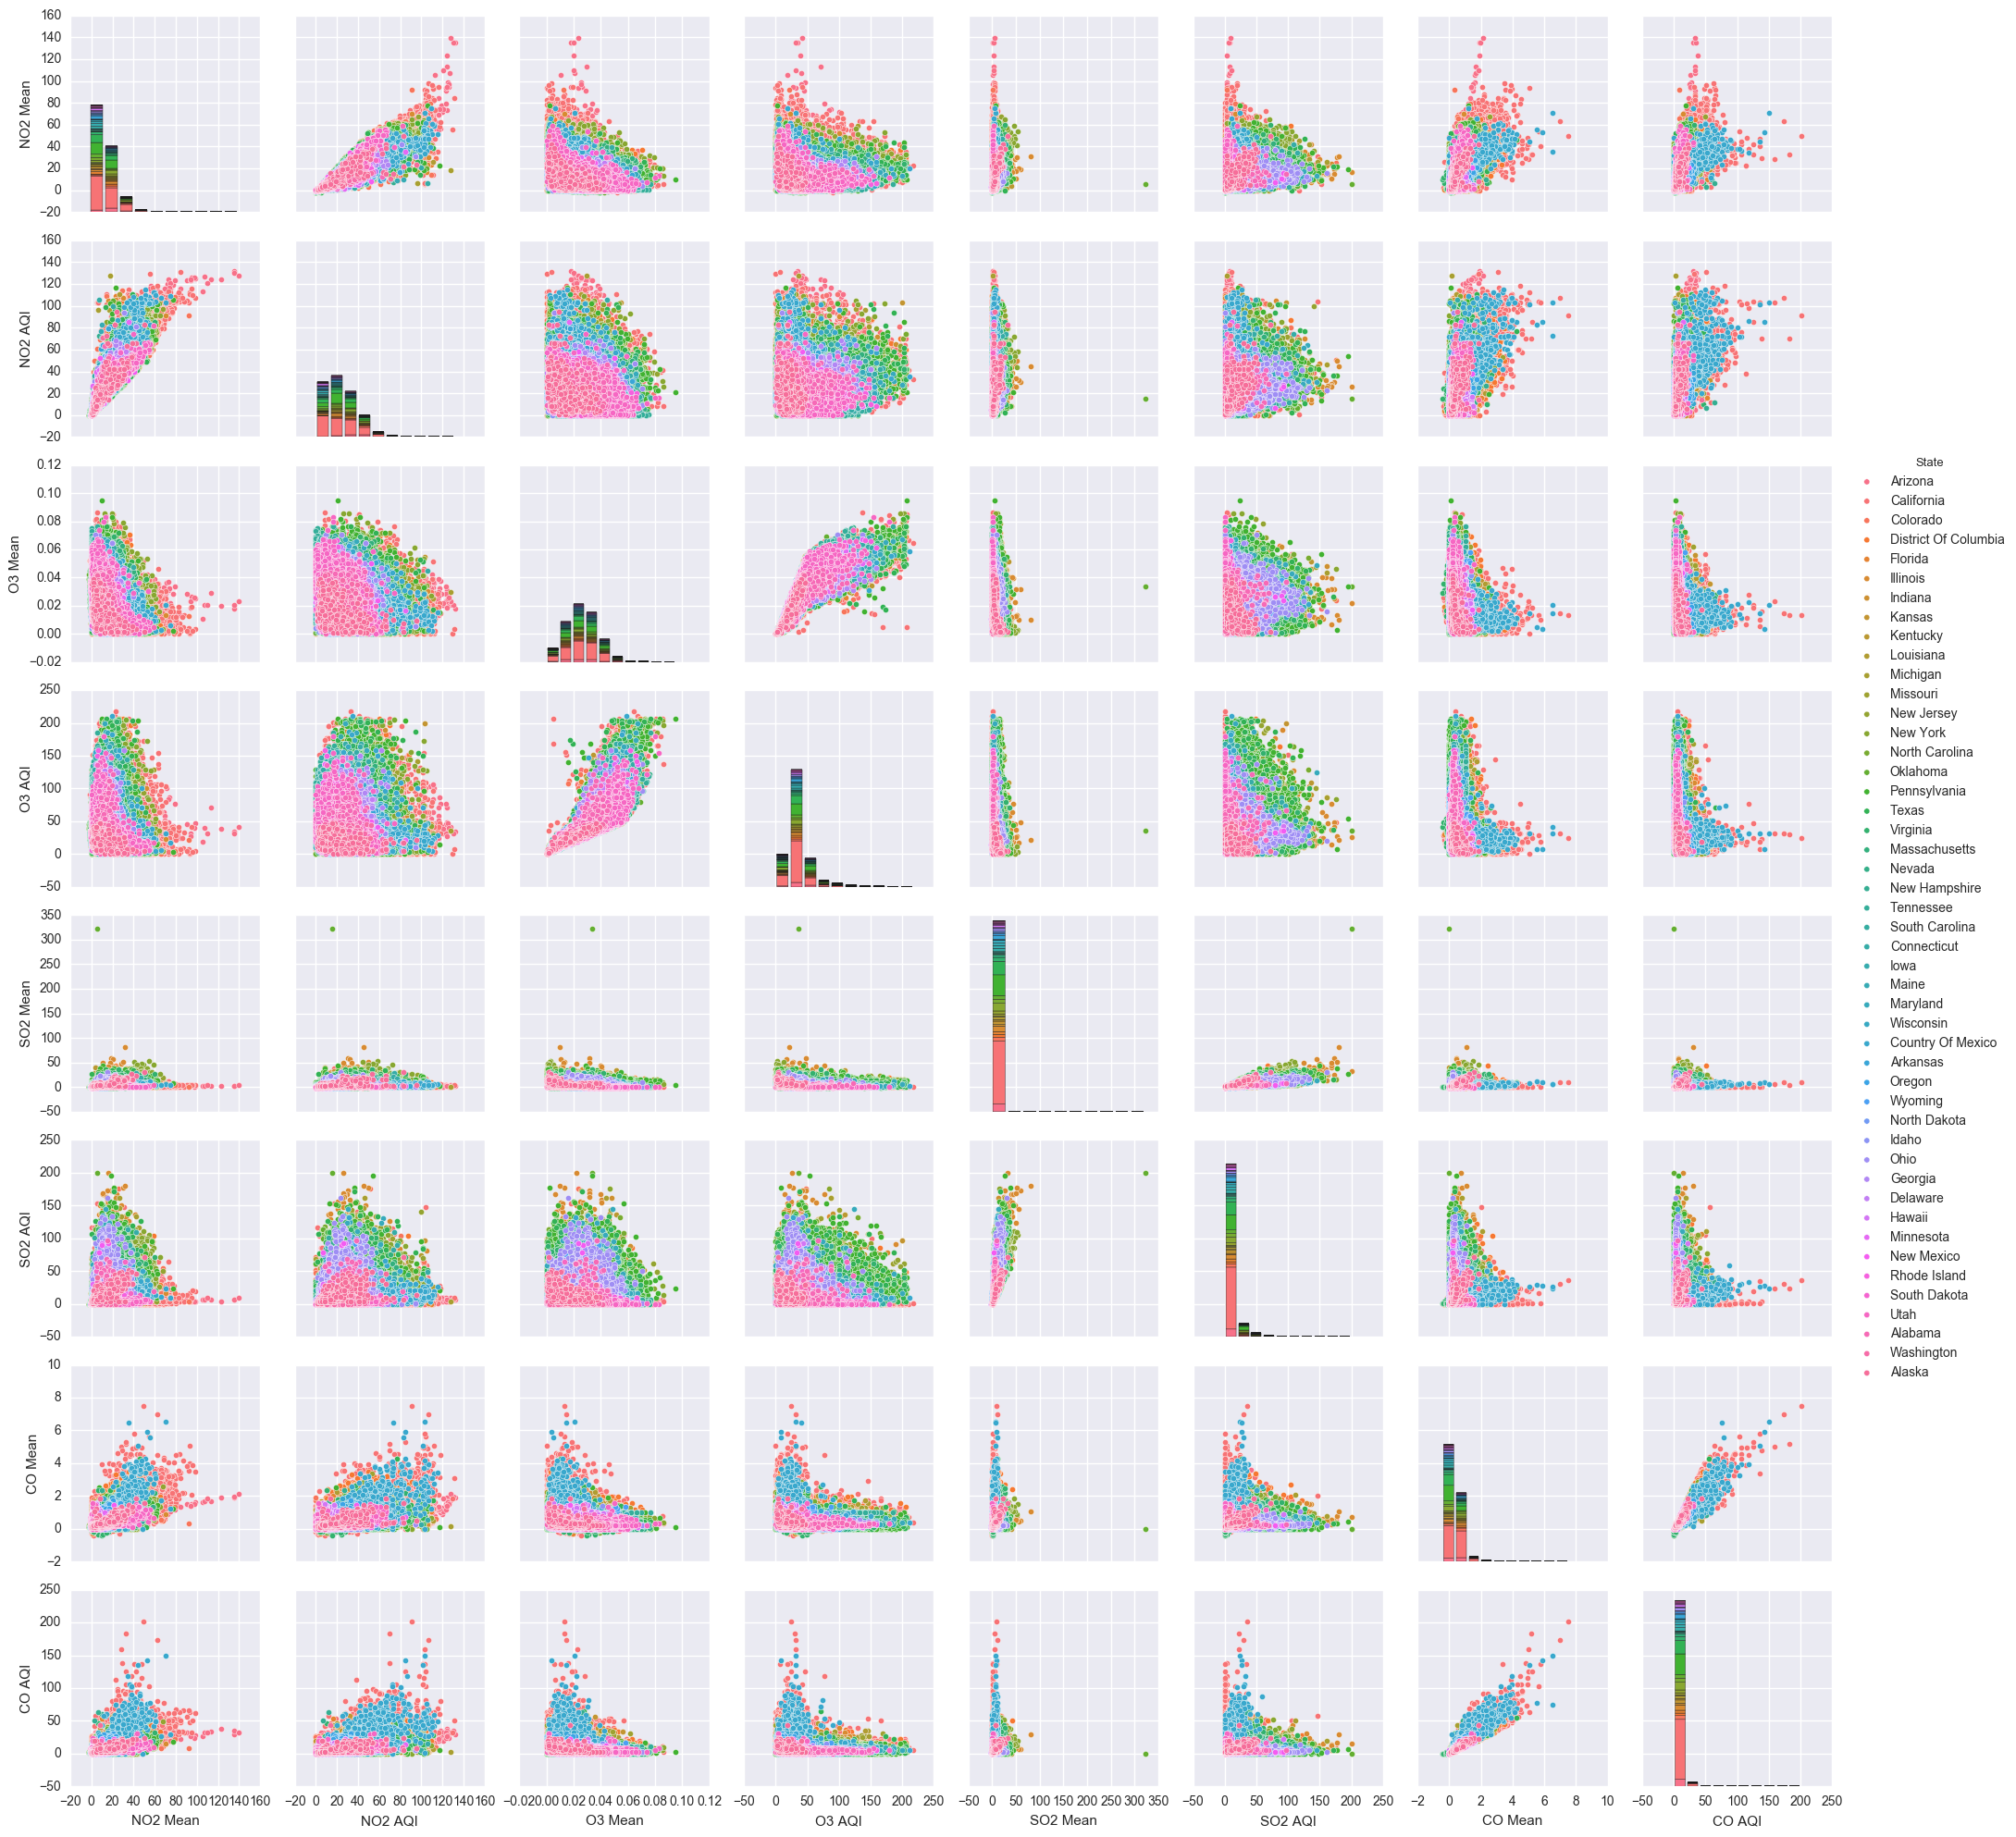

In [89]:
sns.set(style="darkgrid")
sns.pairplot(data1, hue="State")

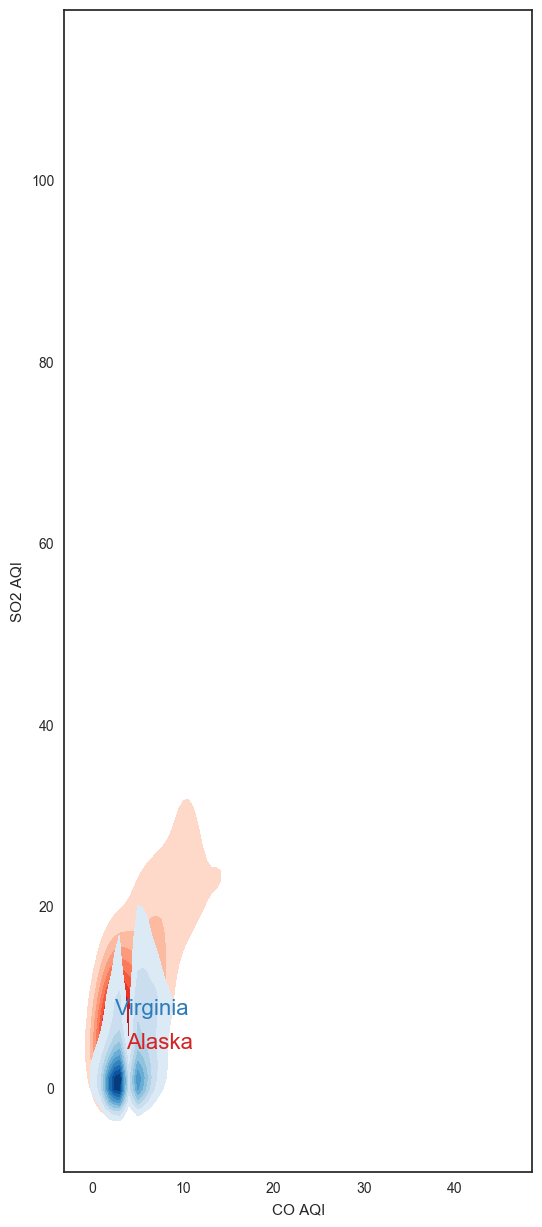

In [124]:
sns.set(style="white")

# Subset the dataset by State
alaska = data1.query("State == 'Alaska'")
virginia = data1.query("State == 'Virginia'")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 15))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(alaska["CO AQI"], alaska["SO2 AQI"],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginia["CO AQI"], virginia["SO2 AQI"],
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Virginia", size=16, color=blue)
ax.text(3.8, 4.5, "Alaska", size=16, color=red)